# 2. The Gaussian Mixture Model

In [1]:
import numpy as np
from quantum_measurement_functions import *
import matplotlib.pyplot as plt
import random

## Sampling the Gaussian Mixture Model that represents the IQ-plane data

In [106]:
# Insert the desired means for sampling
mu1 = np.array([-2.5, 2.0])
mu2 = np.array([2.5, 2.0])

# Select the number of samples (as per counts.ipynb)
num_samples = 10000

# Insert the counts exported from counts.ipynb
nx = [4980,5020]
ny = [5008,4992]
nz = [9417,583]

In [118]:
### Sample the distributions according to nx, ny, nz (the counts obtained from counts.ipynb)
x1, x2 = sample_spherical_gaussians(mu1, mu2, nx[0], nx[1])
y1, y2 = sample_spherical_gaussians(mu1, mu2, ny[0], ny[1])
z1, z2 = sample_spherical_gaussians(mu1, mu2, nz[0], nz[1])

In [100]:
def scatter_plot(list1, list2, title=None, marker_size=5):
    x_values1 = [point[0] for point in list1]
    y_values1 = [point[1] for point in list1]

    x_values2 = [point[0] for point in list2]
    y_values2 = [point[1] for point in list2]

    plt.scatter(x_values1, y_values1, label='- 1', color='r', marker='o', s=marker_size)
    plt.scatter(x_values2, y_values2, label='+1', color='b', marker='x', s=marker_size)

    if title:
        plt.title(title)
    plt.legend(loc='best')

def side_scatter_plot(data_sets, titles=None, marker_size=5):
    n = len(data_sets)
    fig, axes = plt.subplots(1, n, figsize=(5 * n, 5), sharey=True)

    for i, data_set in enumerate(data_sets):
        plt.sca(axes[i])
        title = titles[i] if titles else None
        scatter_plot(data_set[0], data_set[1], title, marker_size)

    plt.show()

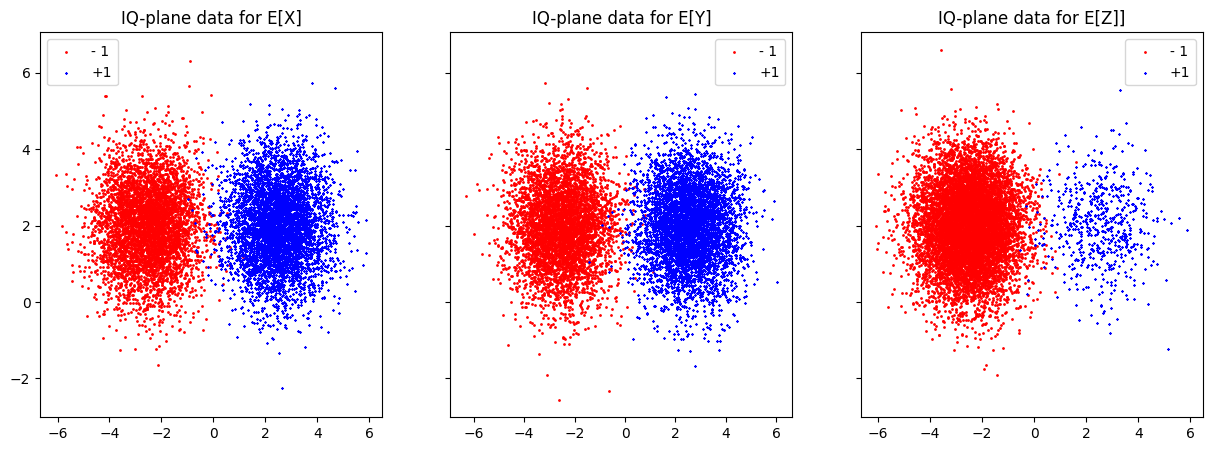

In [101]:
data_sets = [(x1, x2), (y1, y2), (z1, z2)]
titles = ['IQ-plane data for E[X]', 'IQ-plane data for E[Y]', 'IQ-plane data for E[Z]]']
side_scatter_plot(data_sets, titles, marker_size=1)

_______

## Estimating the GMM parameters using MLE

In [84]:
# Concatenate the two lists resulting from each Gaussian
x_concatenated = x1 + x2
y_concatenated = y1 + y2
z_concatenated = z1 + z2

# Format the IQ-plane data
IQ_plane_data = [x_concatenated, y_concatenated, z_concatenated]
IQ_plane_data_names = ['Results for E[X]', 'Results for E[Y]', 'Results for E[Z]']

# Shuffle the combined list randomly - Not needed
random.shuffle(x_concatenated)
random.shuffle(y_concatenated)
random.shuffle(z_concatenated)

In [85]:
# Completely skip this - Just to confirm that the distributions match

# plot
# Separate the x and y coordinates
#w1 = [point[0] for point in x_concatenated]
#w2 = [point[1] for point in x_concatenated]

# Create a scatter plot
#plt.scatter(w1, w2)

#plt.title('Scatter plot of 2D vectors')

# Show the plot
#plt.show()

In [102]:
# Defining a function to estimate all means of the GMM 
def provide_multiple_estimates(lists):
    for data_list in lists:
        data = np.array(data_list)
        mean1, mean2 = estimate_gaussian_means(data)
        print("Estimated means:", mean1, mean2)
        
        
provide_multiple_estimates(IQ_plane_data)

Estimated means: [-2.50674629  2.00665567] [2.49567456 2.02184321]
Estimated means: [-2.52856719  1.99034016] [2.50924702 1.98325512]
Estimated means: [-2.53985885  1.99254772] [2.17429486 2.02868298]


In [103]:
def provide_multiple_estimates(lists, list_names):
    for data_list, list_name in zip(lists, list_names):
        data = np.array(data_list)
        mean1, mean2 = estimate_gaussian_means(data)
        print(f"Estimated means for {list_name}:", mean1, mean2)

provide_multiple_estimates(IQ_plane_data, IQ_plane_data_names)

Estimated means for Results for E[X]: [-2.50674629  2.00665567] [2.49567456 2.02184321]
Estimated means for Results for E[Y]: [2.50924702 1.98325512] [-2.52856719  1.99034016]
Estimated means for Results for E[Z]: [-2.53985885  1.99254772] [2.17429486 2.02868298]


## Determine the membership counts

In [109]:
final_estimated_counts = []

for index, (data_list, list_name) in enumerate(zip(IQ_plane_data, IQ_plane_data_names)):
    count_0, count_1 = gaussian_membership(data_list, mean1, mean2)
    print(f"{list_name} (Element {index}):")
    print("The zero counts are", count_0)
    print("The one counts are", count_1)
    print()
    
    # Save the counts to the final_estimated_counts list
    final_estimated_counts.append((count_0, count_1))

# final_estimated_counts now contains the counts as tuples
print("Final estimated counts:", final_estimated_counts)

Results for E[X] (Element 0):
The zero counts are 5017
The one counts are 4983

Results for E[Y] (Element 1):
The zero counts are 5009
The one counts are 4991

Results for E[Z] (Element 2):
The zero counts are 637
The one counts are 9363

Final estimated counts: [(5017, 4983), (5009, 4991), (637, 9363)]


________

## Construct the estimated b vector

In [111]:
final_estimated_counts[0][1]

4983

In [119]:
# Construct Equation (56)

b_estimated_vector = []

# Iterate through final_estimated_counts and compute each component of the b vector
for counts in final_estimated_counts:
    b_component = 1/num_samples * (counts[0] - counts[1])
    b_estimated_vector.append(b_component)

# Convert the list to a tuple
b_estimated_vector = tuple(b_empirical_vector)

print("The resulting b vector is", b_estimated_vector)

The resulting b vector is (0.0034000000000000002, 0.0018000000000000002, -0.8726)
